** Probando el funcionamiento de la red**

- Muestra una imagene , su matriz y su normalización


In [1]:
import os #<----  Libreria para nevegar en los archivos de la PC.
import cv2 #<---- Libreria para trabajar con imagenes 
import numpy as np
from sklearn.model_selection import train_test_split


# Define las rutas a las carpetas de imágenes
path_vinos = "D:\MAESTRIA\Tesis\Bases_de_datos\caberne"
path_otros = "D:\MAESTRIA\Tesis\Bases_de_datos\otros"

# Define el tamaño deseado para todas las imágenes
ancho_deseado = 300
alto_deseado = 300

# Crea listas vacías para almacenar las imágenes y sus etiquetas
imagenes = []
etiquetas = []

count = 0  # Variable para contar el número de imágenes mostradas

for filename in os.listdir(path_vinos):
    # Lee la imagen
    img = cv2.imread(os.path.join(path_vinos, filename)) #<--(1)
    print(f"la matriz de la imagen original redimensionada es..\n\n{img}") #<--------(OJO)

    # Muestra la imagen original sin redimensionar
    cv2.imshow("Imagen Original", img)

    # Espera a que se presione una tecla (0 indica que espera indefinidamente)
    cv2.waitKey(0)

    # Cambia el tamaño de la imagen
    img = cv2.resize(img, (ancho_deseado, alto_deseado))
    print(f"la matriz de la imagen original redimensionada es..\n\n{img}") #<--------(OJO)

    # Muestra la imagen original sin redimensionar
    cv2.imshow("Imagen Redimensionada", img)

    # Espera a que se presione una tecla (0 indica que espera indefinidamente)
    cv2.waitKey(0)

    # Cierra la ventana de visualización
    cv2.destroyAllWindows()

    # Incrementa el contador de imágenes mostradas
    count += 1

    #normalizacion de la imagen
   
    normalized_data = (img - 0) / (255 - 0)

    # Agrega la imagen y su etiqueta a las listas
    imagenes.append(normalized_data)
    etiquetas.append(0)

    # Verifica si se han mostrado 5 imágenes y termina el bucle
    if count >= 1:
        break


# Convierte las listas en arrays de NumPy ////////////////////////////////////////////////////////////////////////////////////////////
imagenes = np.array(imagenes, dtype=np.float32)
etiquetas = np.array(etiquetas)

print(imagenes)
print(etiquetas)


la matriz de la imagen original redimensionada es..

[[[60 91 88]
  [60 91 88]
  [60 91 88]
  ...
  [28 45 42]
  [28 45 42]
  [28 45 42]]

 [[60 91 88]
  [60 91 88]
  [60 91 88]
  ...
  [28 45 42]
  [28 45 42]
  [28 45 42]]

 [[60 91 88]
  [60 91 88]
  [60 91 88]
  ...
  [28 45 42]
  [28 45 42]
  [28 45 42]]

 ...

 [[55 76 78]
  [55 76 78]
  [55 76 78]
  ...
  [53 84 81]
  [53 84 81]
  [53 84 81]]

 [[55 76 78]
  [55 76 78]
  [55 76 78]
  ...
  [53 84 81]
  [53 84 81]
  [53 84 81]]

 [[55 76 78]
  [55 76 78]
  [55 76 78]
  ...
  [53 84 81]
  [53 84 81]
  [53 84 81]]]
la matriz de la imagen original redimensionada es..

[[[60 91 88]
  [63 94 91]
  [66 97 94]
  ...
  [32 49 46]
  [30 47 44]
  [28 45 42]]

 [[60 91 88]
  [63 94 91]
  [66 97 94]
  ...
  [32 49 46]
  [30 47 44]
  [28 45 42]]

 [[60 91 88]
  [63 94 91]
  [66 97 94]
  ...
  [32 49 46]
  [30 47 44]
  [28 45 42]]

 ...

 [[55 76 78]
  [58 79 81]
  [60 81 83]
  ...
  [59 90 87]
  [56 87 84]
  [53 84 81]]

 [[55 76 78]
  [58 79 

Agregar una normalizacion antes de convertir a punto flotante 

**vinos vs objetos aleatorios de internet**

- Red densa



Epoch 1/20
25/25 [==============================] - 25s 733ms/step - loss: 94.6209 - accuracy: 0.7345
Epoch 2/20
25/25 [==============================] - 15s 611ms/step - loss: 61.2392 - accuracy: 0.8078
Epoch 3/20
25/25 [==============================] - 17s 684ms/step - loss: 68.7737 - accuracy: 0.8091
Epoch 4/20
25/25 [==============================] - 14s 572ms/step - loss: 24.9949 - accuracy: 0.8824
Epoch 5/20
25/25 [==============================] - 15s 603ms/step - loss: 35.5098 - accuracy: 0.8748
Epoch 6/20
25/25 [==============================] - 15s 617ms/step - loss: 29.0196 - accuracy: 0.8786
Epoch 7/20
25/25 [==============================] - 17s 661ms/step - loss: 13.8857 - accuracy: 0.9178
Epoch 8/20
25/25 [==============================] - 15s 589ms/step - loss: 5.3851 - accuracy: 0.9482
Epoch 9/20
25/25 [==============================] - 15s 613ms/step - loss: 7.7598 - accuracy: 0.9431
Epoch 10/20
25/25 [==============================] - 20s 789ms/step - loss: 18.6480 

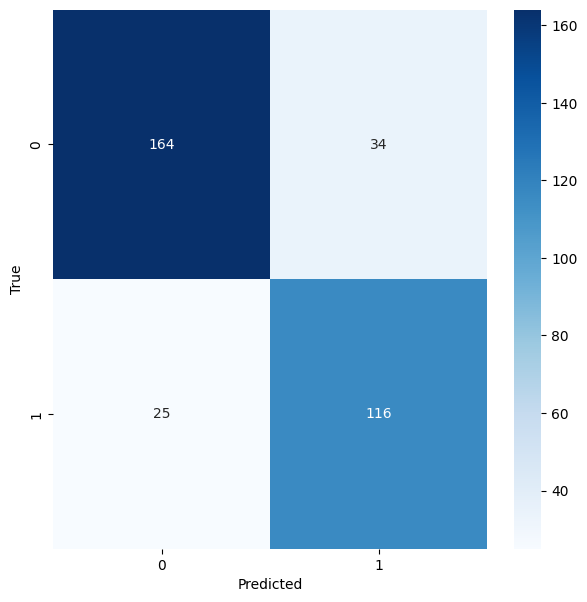


 0 = Otros objetos 
 1 = Vinos 
Cantidad de imágenes por clase en entrenamiento:
Clase 0: 436 imágenes
Clase 1: 355 imágenes

Cantidad de imágenes por clase en prueba:
Clase 0: 198 imágenes
Clase 1: 141 imágenes

Tus valores de la precisión y la exactitud para este experimento son:

Exactitud: 0.8259587020648967
Precisión: 0.7733333333333333


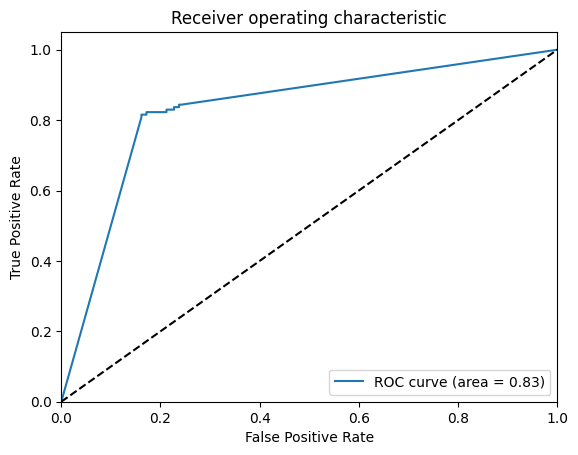

In [1]:
import os #<----  Libreria para nevegar en los archivos de la PC.
import cv2 #<---- Libreria para trabajar con imagenes 
import numpy as np
from sklearn.model_selection import train_test_split


from tensorflow import keras
from collections import Counter
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define las rutas a las carpetas de imágenes
path_vinos = "D:\MAESTRIA\Tesis\Bases_de_datos\caberne"
path_otros = "D:\MAESTRIA\Tesis\Bases_de_datos\otros"

# Define el tamaño deseado para todas las imágenes
ancho_deseado = 300
alto_deseado = 300

# Crea listas vacías para almacenar las imágenes y sus etiquetas
imagenes = []
etiquetas = []

for filename in os.listdir(path_vinos):
    # Lee la imagen
    img = cv2.imread(os.path.join(path_vinos, filename)) #<--(1)

    # Cambia el tamaño de la imagen
    img = cv2.resize(img, (ancho_deseado, alto_deseado))

    #normalizacion de la imagen
    normalized_data = (img - 0) / (255 - 0)

    # Agrega la imagen y su etiqueta a las listas
    imagenes.append(normalized_data)
    etiquetas.append(1)


for filename in os.listdir(path_otros):
    # Lee la imagen
    img = cv2.imread(os.path.join(path_otros, filename)) #<--(1)
    #print(f"la matriz de la imagen original redimensionada es..\n\n{img}") #<--------(OJO)

    # Muestra la imagen original sin redimensionar
    #cv2.imshow("Imagen Original", img)

    # Espera a que se presione una tecla (0 indica que espera indefinidamente)
    #cv2.waitKey(0)

    # Cambia el tamaño de la imagen
    img = cv2.resize(img, (ancho_deseado, alto_deseado))
    #print(f"la matriz de la imagen original redimensionada es..\n\n{img}") #<--------(OJO)

    # Muestra la imagen original sin redimensionar
    #cv2.imshow("Imagen Redimensionada", img)

    # Espera a que se presione una tecla (0 indica que espera indefinidamente)
    #cv2.waitKey(0)

    # Cierra la ventana de visualización
    #cv2.destroyAllWindows()

    #normalizacion de la imagen
    normalized_data = (img - 0) / (255 - 0)

    # Agrega la imagen y su etiqueta a las listas
    imagenes.append(normalized_data)
    etiquetas.append(0)


# Convierte las listas en arrays de NumPy ////////////////////////////////////////////////////////////////////////////////////////////
imagenes = np.array(imagenes, dtype=np.float32)
etiquetas = np.array(etiquetas)

#print(imagenes)
#print(etiquetas)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.3)


# Contar imágenes de cada clase en entrenamiento y prueba
conteo_clases_train = Counter(y_train)
conteo_clases_test = Counter(y_test)


# Define el modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(alto_deseado, ancho_deseado, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# Compila el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrena el modelo
history = model.fit(X_train, y_train, epochs=20) #<---------

# Evalúa el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
#print('Test accuracy:', test_acc)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcula la exactitud (accuracy) y la precisión
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(f"\n 0 = Otros objetos \n 1 = Vinos ")

# Imprimir cantidad de imágenes por clase en entrenamiento y prueba
print("Cantidad de imágenes por clase en entrenamiento:")
for clase, cantidad in conteo_clases_train.items():
    print(f"Clase {clase}: {cantidad} imágenes")

print("\nCantidad de imágenes por clase en prueba:")
for clase, cantidad in conteo_clases_test.items():
    print(f"Clase {clase}: {cantidad} imágenes")


print("\nTus valores de la precisión y la exactitud para este experimento son:\n")

print("Exactitud:", accuracy)
print("Precisión:", precision)


# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()




**vinos vs otros obejtos tomados en centros comerciales**

- Red densa


In [1]:
import os #<----  Libreria para nevegar en los archivos de la PC.
import cv2 #<---- Libreria para trabajar con imagenes 
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from collections import Counter
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Especificar las rutas de las carpetas con imágenes
path_vinos = "D:\\MAESTRIA\\Tesis\\Bases_de_datos\\vinoshdrestantes"
path_otros = "D:\\MAESTRIA\Tesis\\Bases_de_datos\\otroshdrestantes"

# Contar imágenes en la carpeta  
def contar_imagenes(ruta_carpeta):
    num_imagenes = 0
    extensiones_validas = [".jpg", ".jpeg", ".png", ".bmp", ".gif", ".tiff", ".webp"]

    for archivo in os.listdir(ruta_carpeta):
        if os.path.splitext(archivo)[1].lower() in extensiones_validas:
            num_imagenes += 1

    return num_imagenes

# usamos la funcion creada para 
cantidad_imagenes1 = contar_imagenes(path_vinos)
cantidad_imagenes2 = contar_imagenes(path_otros)

# Define el tamaño deseado para todas las imágenes
ancho_deseado = 600
alto_deseado = 600

# Crea listas vacías para almacenar las imágenes y sus etiquetas
imagenes = []
etiquetas = []

for filename in os.listdir(path_vinos):
    # Lee la imagen
    img = cv2.imread(os.path.join(path_vinos, filename)) #<--(1)

    # Cambia el tamaño de la imagen
    img = cv2.resize(img, (ancho_deseado, alto_deseado))

    #normalizacion de la imagen
    normalized_data = (img - 0) / (255 - 0)

    # Agrega la imagen y su etiqueta a las listas
    imagenes.append(normalized_data)
    etiquetas.append(1)


for filename in os.listdir(path_otros):
    # Lee la imagen
    img = cv2.imread(os.path.join(path_otros, filename)) #<--(1)
    #print(f"la matriz de la imagen original redimensionada es..\n\n{img}") #<--------(OJO)

    # Muestra la imagen original sin redimensionar
    #cv2.imshow("Imagen Original", img)

    # Espera a que se presione una tecla (0 indica que espera indefinidamente)
    #cv2.waitKey(0)

    # Cambia el tamaño de la imagen
    img = cv2.resize(img, (ancho_deseado, alto_deseado))
    #print(f"la matriz de la imagen original redimensionada es..\n\n{img}") #<--------(OJO)

    # Muestra la imagen original sin redimensionar
    #cv2.imshow("Imagen Redimensionada", img)

    # Espera a que se presione una tecla (0 indica que espera indefinidamente)
    #cv2.waitKey(0)

    # Cierra la ventana de visualización
    #cv2.destroyAllWindows()

    #normalizacion de la imagen
    normalized_data = (img - 0) / (255 - 0)

    # Agrega la imagen y su etiqueta a las listas
    imagenes.append(normalized_data)
    etiquetas.append(0)


# Convierte las listas en arrays de NumPy ////////////////////////////////////////////////////////////////////////////////////////////
imagenes = np.array(imagenes, dtype=np.float32)
etiquetas = np.array(etiquetas)

#print(imagenes)
#print(etiquetas)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.7)


# Contar imágenes de cada clase en entrenamiento y prueba
conteo_clases_train = Counter(y_train)
conteo_clases_test = Counter(y_test)


# Define el modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(alto_deseado, ancho_deseado, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# Compila el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrena el modelo
history = model.fit(X_train, y_train, epochs=20) #<---------

# Evalúa el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
#print('Test accuracy:', test_acc)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcula la exactitud (accuracy) y la precisión
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Graficar la matriz de confusión ////////////////////////////////////////////////////////////////////////////////////////////////////////////
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(f"\n 0 = Otros objetos \n 1 = Vinos\n")
print("Hay", cantidad_imagenes1, "imágenes de vinos.")
print("Hay", cantidad_imagenes2, "imágenes de otros objetos.")
print("\nDe las cuales se tomaron los siguientes cantidades para entrenamiento y prueba\n")

# Imprimir cantidad de imágenes por clase en entrenamiento y prueba
print("Cantidad de imágenes por clase en entrenamiento:")
for clase, cantidad in conteo_clases_train.items():
    print(f"Clase {clase}: {cantidad} imágenes")

print("\nCantidad de imágenes por clase en prueba:")
for clase, cantidad in conteo_clases_test.items():
    print(f"Clase {clase}: {cantidad} imágenes")


print("\nTus valores de la precisión y la exactitud para este experimento son:\n")
print("Exactitud:", accuracy)
print("Precisión:", precision)


# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Epoch 1/20
3/3 [==============================] - 114s 21s/step - loss: 42.2871 - accuracy: 0.7361
Epoch 2/20
3/3 [==============================] - 98s 35s/step - loss: 16.3776 - accuracy: 0.9722
Epoch 3/20
3/3 [==============================] - 186s 69s/step - loss: 71.4902 - accuracy: 0.9444
Epoch 4/20


 **vinos claros vs vinos obscuros de internet**

 - Red densa
 

Epoch 1/20
10/10 [==============================] - 8s 541ms/step - loss: 159.1625 - accuracy: 0.6429
Epoch 2/20
10/10 [==============================] - 5s 509ms/step - loss: 69.4512 - accuracy: 0.7959
Epoch 3/20
10/10 [==============================] - 5s 512ms/step - loss: 23.4089 - accuracy: 0.8980
Epoch 4/20
10/10 [==============================] - 5s 507ms/step - loss: 23.9314 - accuracy: 0.9082
Epoch 5/20
10/10 [==============================] - 5s 509ms/step - loss: 14.2327 - accuracy: 0.9116
Epoch 6/20
10/10 [==============================] - 5s 507ms/step - loss: 28.5672 - accuracy: 0.9014
Epoch 7/20
10/10 [==============================] - 5s 505ms/step - loss: 86.8856 - accuracy: 0.8299
Epoch 8/20
10/10 [==============================] - 5s 510ms/step - loss: 31.4877 - accuracy: 0.9014
Epoch 9/20
10/10 [==============================] - 5s 507ms/step - loss: 43.9645 - accuracy: 0.9150
Epoch 10/20
10/10 [==============================] - 5s 508ms/step - loss: 21.0027 - accur

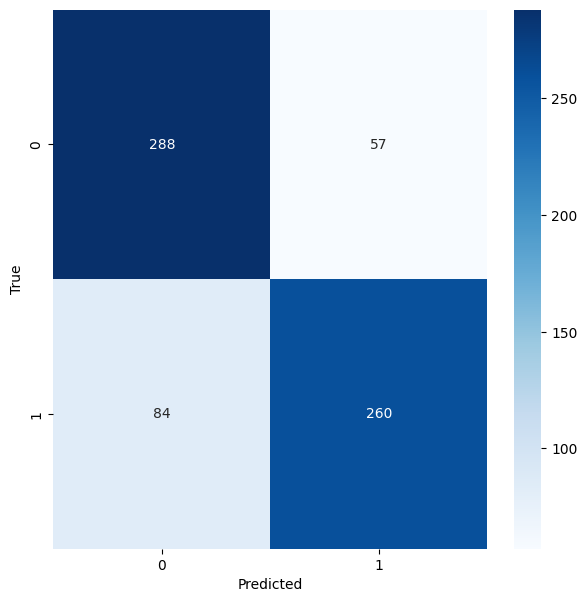


 0 = vinos claros 
 1 = Vinos obscuros

Hay 496 imágenes de vinos obscuros.
Hay 487 imágenes de vinos claros.

De las cuales se tomaron los siguientes cantidades para entrenamiento y prueba

Cantidad de imágenes por clase en entrenamiento:
Clase 0: 142 imágenes
Clase 1: 152 imágenes

Cantidad de imágenes por clase en prueba:
Clase 1: 344 imágenes
Clase 0: 345 imágenes

Tus valores de la precisión y la exactitud para este experimento son:

Exactitud: 0.795355587808418
Precisión: 0.8201892744479495


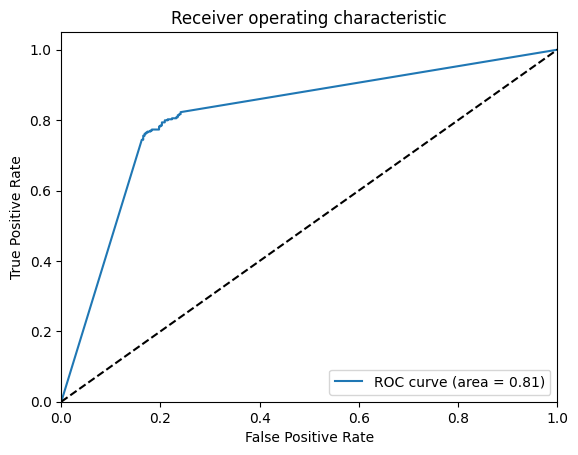

In [5]:
import os #<----  Libreria para nevegar en los archivos de la PC.
import cv2 #<---- Libreria para trabajar con imagenes 
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from collections import Counter
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Especificar las rutas de las carpetas con imágenes
path_vinos = "D:\MAESTRIA\Tesis\Bases_de_datos\caberne"
path_otros = "D:\MAESTRIA\Tesis\Bases_de_datos\chardonay"

# Contar imágenes en la carpeta  
def contar_imagenes(ruta_carpeta):
    num_imagenes = 0
    extensiones_validas = [".jpg", ".jpeg", ".png", ".bmp", ".gif", ".tiff", ".webp"]

    for archivo in os.listdir(ruta_carpeta):
        if os.path.splitext(archivo)[1].lower() in extensiones_validas:
            num_imagenes += 1

    return num_imagenes

# usamos la funcion creada para 
cantidad_imagenes1 = contar_imagenes(path_vinos)
cantidad_imagenes2 = contar_imagenes(path_otros)

# Define el tamaño deseado para todas las imágenes
ancho_deseado = 300
alto_deseado = 300

# Crea listas vacías para almacenar las imágenes y sus etiquetas
imagenes = []
etiquetas = []

for filename in os.listdir(path_vinos):
    # Lee la imagen
    img = cv2.imread(os.path.join(path_vinos, filename)) #<--(1)

    # Cambia el tamaño de la imagen
    img = cv2.resize(img, (ancho_deseado, alto_deseado))

    #normalizacion de la imagen
    normalized_data = (img - 0) / (255 - 0)

    # Agrega la imagen y su etiqueta a las listas
    imagenes.append(normalized_data)
    etiquetas.append(1)


for filename in os.listdir(path_otros):
    # Lee la imagen
    img = cv2.imread(os.path.join(path_otros, filename)) #<--(1)
    #print(f"la matriz de la imagen original redimensionada es..\n\n{img}") #<--------(OJO)

    # Muestra la imagen original sin redimensionar
    #cv2.imshow("Imagen Original", img)

    # Espera a que se presione una tecla (0 indica que espera indefinidamente)
    #cv2.waitKey(0)

    # Cambia el tamaño de la imagen
    img = cv2.resize(img, (ancho_deseado, alto_deseado))
    #print(f"la matriz de la imagen original redimensionada es..\n\n{img}") #<--------(OJO)

    # Muestra la imagen original sin redimensionar
    #cv2.imshow("Imagen Redimensionada", img)

    # Espera a que se presione una tecla (0 indica que espera indefinidamente)
    #cv2.waitKey(0)

    # Cierra la ventana de visualización
    #cv2.destroyAllWindows()

    #normalizacion de la imagen
    normalized_data = (img - 0) / (255 - 0)

    # Agrega la imagen y su etiqueta a las listas
    imagenes.append(normalized_data)
    etiquetas.append(0)


# Convierte las listas en arrays de NumPy ////////////////////////////////////////////////////////////////////////////////////////////
imagenes = np.array(imagenes, dtype=np.float32)
etiquetas = np.array(etiquetas)

#print(imagenes)
#print(etiquetas)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.7)


# Contar imágenes de cada clase en entrenamiento y prueba
conteo_clases_train = Counter(y_train)
conteo_clases_test = Counter(y_test)


# Define el modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(alto_deseado, ancho_deseado, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# Compila el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrena el modelo
history = model.fit(X_train, y_train, epochs=20) #<---------

# Evalúa el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
#print('Test accuracy:', test_acc)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcula la exactitud (accuracy) y la precisión
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Graficar la matriz de confusión ////////////////////////////////////////////////////////////////////////////////////////////////////////////
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(f"\n 0 = vinos claros \n 1 = Vinos obscuros\n")
print("Hay", cantidad_imagenes1, "imágenes de vinos obscuros.")
print("Hay", cantidad_imagenes2, "imágenes de vinos claros.")
print("\nDe las cuales se tomaron los siguientes cantidades para entrenamiento y prueba\n")

# Imprimir cantidad de imágenes por clase en entrenamiento y prueba
print("Cantidad de imágenes por clase en entrenamiento:")
for clase, cantidad in conteo_clases_train.items():
    print(f"Clase {clase}: {cantidad} imágenes")

print("\nCantidad de imágenes por clase en prueba:")
for clase, cantidad in conteo_clases_test.items():
    print(f"Clase {clase}: {cantidad} imágenes")


print("\nTus valores de la precisión y la exactitud para este experimento son:\n")
print("Exactitud:", accuracy)
print("Precisión:", precision)


# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Ahora provando ResNEt50**
-  vinos vs otros (imagénes tomadas de internet)
-  634 de vinos y 634 de otros objetos 





Epoch 1/10
27/27 [==============================] - 59s 2s/step - loss: 0.1422 - accuracy: 0.9456
Epoch 2/10
27/27 [==============================] - 53s 2s/step - loss: 0.0119 - accuracy: 0.9964
Epoch 3/10
27/27 [==============================] - 54s 2s/step - loss: 0.0050 - accuracy: 0.9988
Epoch 4/10
27/27 [==============================] - 54s 2s/step - loss: 0.0019 - accuracy: 1.0000
Epoch 5/10
27/27 [==============================] - 54s 2s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 6/10
27/27 [==============================] - 54s 2s/step - loss: 9.8202e-04 - accuracy: 1.0000
Epoch 7/10
27/27 [==============================] - 53s 2s/step - loss: 7.3870e-04 - accuracy: 1.0000
Epoch 8/10
27/27 [==============================] - 49s 2s/step - loss: 5.8610e-04 - accuracy: 1.0000
Epoch 9/10
27/27 [==============================] - 47s 2s/step - loss: 5.0711e-04 - accuracy: 1.0000
Epoch 10/10
14/14 [==============================] - 24s 2s/step
Epoch 1/10
27/27 [===================

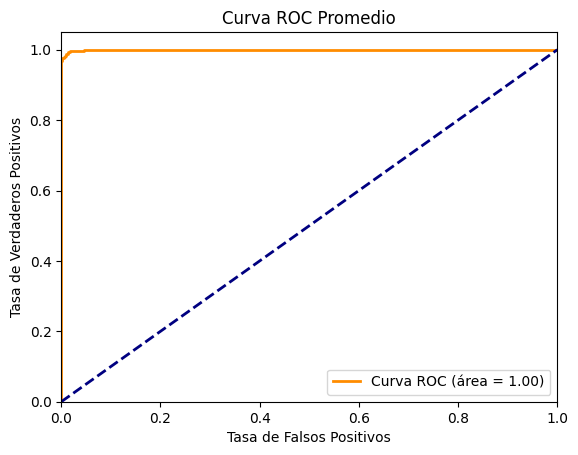

Matriz de Confusión Promedio:
[[628   6]
 [  9 625]]


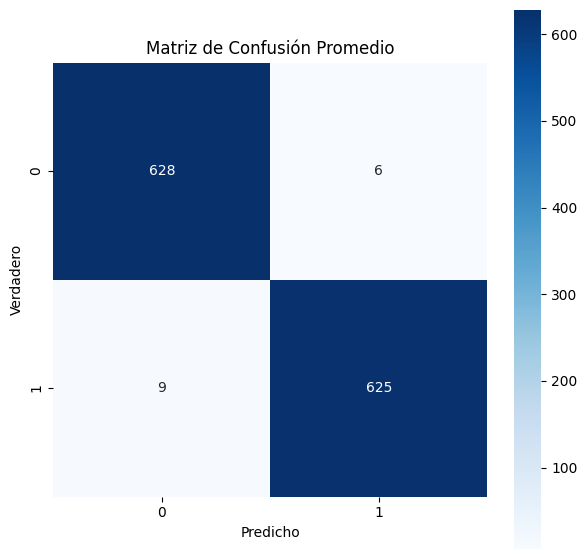

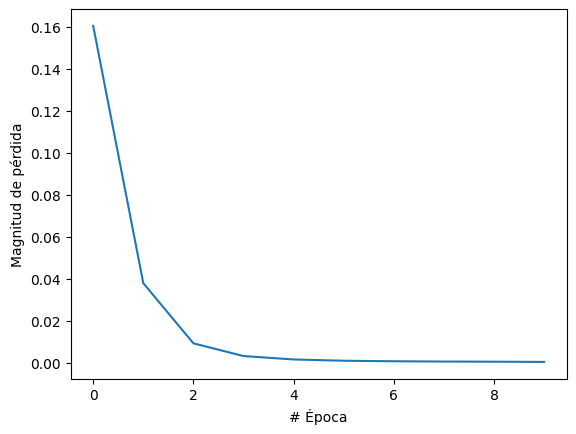

In [1]:
import os
import cv2
import numpy as np
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Importar el modelo preentrenado ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define las rutas a las carpetas de imágenes
path_vinos = "D:\MAESTRIA\Tesis\Bases_de_datos\\vinos"
path_otros = "D:\MAESTRIA\Tesis\Bases_de_datos\otros"

# Define el tamaño deseado para todas las imágenes
ancho_deseado = 224 
alto_deseado = 224

# Crea listas vacías para almacenar las imágenes y sus etiquetas
imagenes = []
etiquetas = []

for filename in os.listdir(path_vinos):
    img = cv2.imread(os.path.join(path_vinos, filename))
    img = cv2.resize(img, (ancho_deseado, alto_deseado)) 
    img = preprocess_input(img)  # Preprocesa la imagen para ResNet50
    imagenes.append(img)
    etiquetas.append(1)

for filename in os.listdir(path_otros):
    img = cv2.imread(os.path.join(path_otros, filename))
    img = cv2.resize(img, (ancho_deseado, alto_deseado))#******
    img = preprocess_input(img)  # Preprocesa la imagen para ResNet50
    imagenes.append(img)
    etiquetas.append(0)

imagenes = np.array(imagenes, dtype=np.float32)
etiquetas = np.array(etiquetas)

# Define el número de pliegues (folds) que deseas utilizar
num_folds = 3  
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Crea listas para almacenar las puntuaciones de precisión de cada fold y las predicciones de probabilidad

accuracy_scores = []
all_y_true = []
all_y_prob = []
all_y_pred = []

for train_index, test_index in kf.split(imagenes):
    X_train, X_test = imagenes[train_index], imagenes[test_index]
    y_train, y_test = etiquetas[train_index], etiquetas[test_index]

    # Cargar el modelo ResNet50 preentrenado
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(alto_deseado, ancho_deseado, 3))
    
    # Agregar capas personalizadas para la clasificación
    x = base_model.output
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    predictions = keras.layers.Dense(2, activation='softmax')(x)
    
    # Crear el modelo completo
    model = keras.models.Model(inputs=base_model.input, outputs=predictions)
    
    # Congelar las capas del modelo base (ResNet50)
    for layer in base_model.layers:
        layer.trainable = False
    
    # Compilar el modelo
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=10)

    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    accuracy_scores.append(test_acc)

    # Realizar predicciones de probabilidad y etiquetas en el conjunto de prueba
    y_prob = model.predict(X_test)
    y_pred = np.argmax(y_prob, axis=1)
    all_y_true.extend(y_test)
    all_y_prob.extend(y_prob[:, 1])
    all_y_pred.extend(y_pred)

# Calcula el promedio de las puntuaciones de precisión de todos los folds
average_accuracy = np.mean(accuracy_scores)

# Calcula la exactitud promedio
average_roc_auc = accuracy_score(all_y_true, np.round(all_y_prob))

# Calcula la matriz de confusión promedio
cm = confusion_matrix(all_y_true, all_y_pred)

# Imprime el promedio de precisión y la exactitud promedio
print(f'Promedio de precisión a través de {num_folds} folds: {average_accuracy}')
print(f'Exactitud promedio a través de {num_folds} folds: {average_roc_auc}')

# Calcula la curva ROC promedio
fpr, tpr, _ = roc_curve(all_y_true, all_y_prob)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC promedio
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Promedio')
plt.legend(loc="lower right")
plt.show()

# Imprime la matriz de confusión promedio
print('Matriz de Confusión Promedio:')
print(cm)

# Grafica la matriz de confusión promedio
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión Promedio')
plt.show()

# Ver la función de pérdida
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])


**ResNet50 de vinos claros vs vinos oscuros** 

- Imágenes tomadas de internet 
- 487 imágenes de vinos oscuros vs 487 imagenes de vinos claros






Epoch 1/10
21/21 [==============================] - 37s 2s/step - loss: 0.3364 - accuracy: 0.8305
Epoch 2/10
21/21 [==============================] - 32s 2s/step - loss: 0.1152 - accuracy: 0.9630
Epoch 3/10
21/21 [==============================] - 32s 2s/step - loss: 0.0673 - accuracy: 0.9800
Epoch 4/10
21/21 [==============================] - 33s 2s/step - loss: 0.0552 - accuracy: 0.9831
Epoch 5/10
21/21 [==============================] - 32s 2s/step - loss: 0.0478 - accuracy: 0.9846
Epoch 6/10
21/21 [==============================] - 32s 2s/step - loss: 0.0373 - accuracy: 0.9954
Epoch 7/10
21/21 [==============================] - 32s 2s/step - loss: 0.0329 - accuracy: 0.9954
Epoch 8/10
21/21 [==============================] - 32s 2s/step - loss: 0.0269 - accuracy: 0.9938
Epoch 9/10
21/21 [==============================] - 32s 2s/step - loss: 0.0211 - accuracy: 0.9954
Epoch 10/10
11/11 [==============================] - 18s 1s/step
Epoch 1/10
21/21 [==============================] - 3

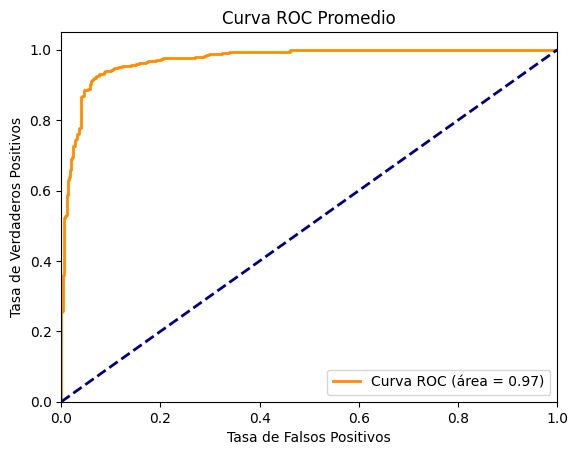

Matriz de Confusión Promedio:
[[459  28]
 [ 51 436]]


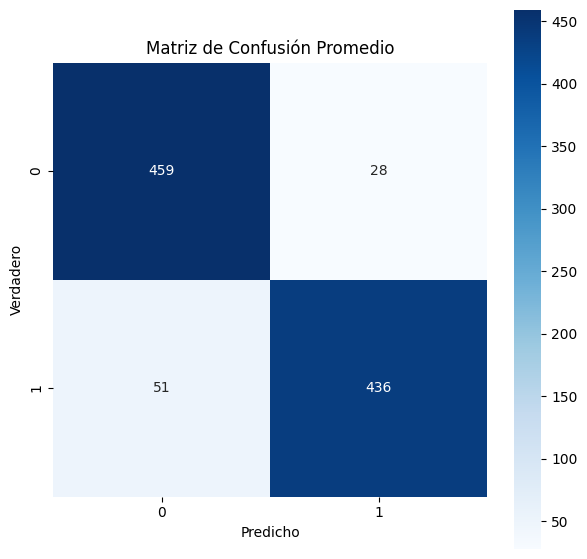

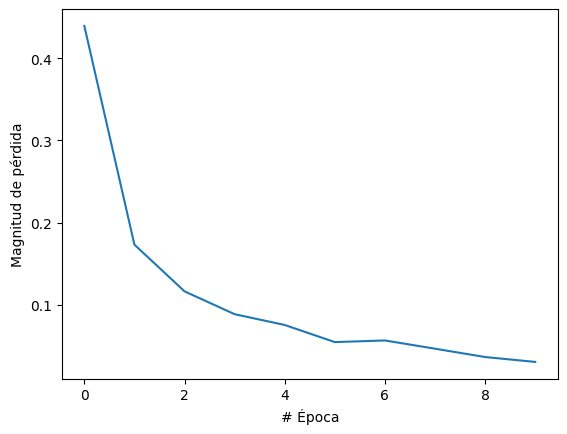

In [1]:
import os
import cv2
import numpy as np
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Importar el modelo preentrenado ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define las rutas a las carpetas de imágenes
path_vinos = "D:\MAESTRIA\Tesis\Bases_de_datos\caberne"
path_otros = "D:\MAESTRIA\Tesis\Bases_de_datos\chardonay"

# Define el tamaño deseado para todas las imágenes
ancho_deseado = 224
alto_deseado = 224

# Crea listas vacías para almacenar las imágenes y sus etiquetas
imagenes = []
etiquetas = []

for filename in os.listdir(path_vinos):
    img = cv2.imread(os.path.join(path_vinos, filename))
    img = cv2.resize(img, (ancho_deseado, alto_deseado))
    img = preprocess_input(img)  # Preprocesa la imagen para ResNet50
    imagenes.append(img)
    etiquetas.append(1)

for filename in os.listdir(path_otros):
    img = cv2.imread(os.path.join(path_otros, filename))
    img = cv2.resize(img, (ancho_deseado, alto_deseado))
    img = preprocess_input(img)  # Preprocesa la imagen para ResNet50
    imagenes.append(img)
    etiquetas.append(0)

imagenes = np.array(imagenes, dtype=np.float32)
etiquetas = np.array(etiquetas)

# Define el número de pliegues (folds) que deseas utilizar
num_folds = 3  
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Crea listas para almacenar las puntuaciones de precisión de cada fold y las predicciones de probabilidad

accuracy_scores = []
all_y_true = []
all_y_prob = []
all_y_pred = []

for train_index, test_index in kf.split(imagenes):
    X_train, X_test = imagenes[train_index], imagenes[test_index]
    y_train, y_test = etiquetas[train_index], etiquetas[test_index]

    # Cargar el modelo ResNet50 preentrenado
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(alto_deseado, ancho_deseado, 3))
    
    # Agregar capas personalizadas para la clasificación
    x = base_model.output
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    predictions = keras.layers.Dense(2, activation='softmax')(x)
    
    # Crear el modelo completo
    model = keras.models.Model(inputs=base_model.input, outputs=predictions)
    
    # Congelar las capas del modelo base (ResNet50)
    for layer in base_model.layers:
        layer.trainable = False
    
    # Compilar el modelo
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=10)

    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    accuracy_scores.append(test_acc)

    # Realizar predicciones de probabilidad y etiquetas en el conjunto de prueba
    y_prob = model.predict(X_test)
    y_pred = np.argmax(y_prob, axis=1)
    all_y_true.extend(y_test)
    all_y_prob.extend(y_prob[:, 1])
    all_y_pred.extend(y_pred)

# Calcula el promedio de las puntuaciones de precisión de todos los folds
average_accuracy = np.mean(accuracy_scores)

# Calcula la exactitud promedio
average_roc_auc = accuracy_score(all_y_true, np.round(all_y_prob))

# Calcula la matriz de confusión promedio
cm = confusion_matrix(all_y_true, all_y_pred)

# Imprime el promedio de precisión y la exactitud promedio
print(f'Promedio de precisión a través de {num_folds} folds: {average_accuracy}')
print(f'Exactitud promedio a través de {num_folds} folds: {average_roc_auc}')

# Calcula la curva ROC promedio
fpr, tpr, _ = roc_curve(all_y_true, all_y_prob)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC promedio
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Promedio')
plt.legend(loc="lower right")
plt.show()

# Imprime la matriz de confusión promedio
print('Matriz de Confusión Promedio:')
print(cm)

# Grafica la matriz de confusión promedio
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión Promedio')
plt.show()

# Ver la función de pérdida
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

**ResNet50 de vinos vs otros HD** 

- Imágenes tomadas de centros comerciales 
- 120 de vinos cuales quiera y 120 de de obejtos aleatorios

Epoch 1/10
5/5 [==============================] - 12s 2s/step - loss: 0.2166 - accuracy: 0.8875
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 0.0110 - accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 0.0030 - accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 0.0010 - accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 2.7164e-04 - accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 1.8692e-04 - accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 1.4345e-04 - accuracy: 1.0000
Epoch 8/10
5/5 [==============================] - 8s 2s/step - loss: 1.2968e-04 - accuracy: 1.0000
Epoch 9/10
5/5 [==============================] - 8s 2s/step - loss: 1.0971e-04 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 6s 1s/step
Epoch 1/10
5/5 [==============================] - 12s 2s/step 

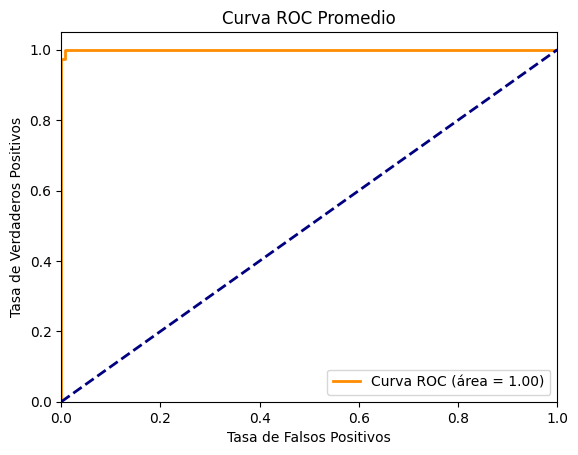

Matriz de Confusión Promedio:
[[119   1]
 [  0 120]]


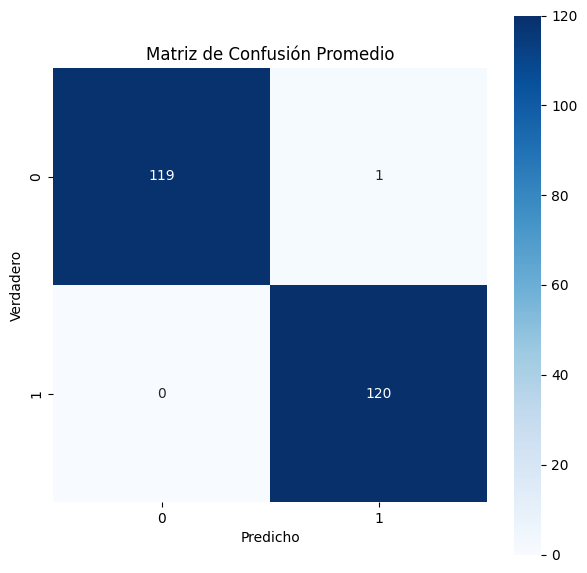

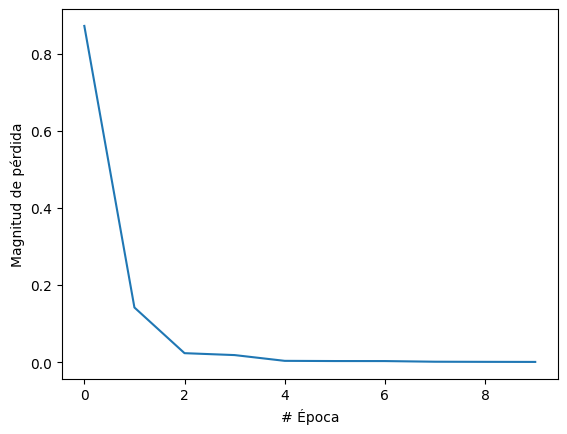

In [2]:
import os
import cv2
import numpy as np
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Importar el modelo preentrenado ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Especificar las rutas de las carpetas con imágenes
path_vinos = "D:\\MAESTRIA\\Tesis\\Bases_de_datos\\vinoshd"
path_otros = "D:\\MAESTRIA\Tesis\\Bases_de_datos\\otroshd"

# Define el tamaño deseado para todas las imágenes
ancho_deseado = 224
alto_deseado = 224

# Crea listas vacías para almacenar las imágenes y sus etiquetas
imagenes = []
etiquetas = []

for filename in os.listdir(path_vinos):
    img = cv2.imread(os.path.join(path_vinos, filename))
    img = cv2.resize(img, (ancho_deseado, alto_deseado))
    img = preprocess_input(img)  # Preprocesa la imagen para ResNet50
    imagenes.append(img)
    etiquetas.append(1)

for filename in os.listdir(path_otros):
    img = cv2.imread(os.path.join(path_otros, filename))
    img = cv2.resize(img, (ancho_deseado, alto_deseado))
    img = preprocess_input(img)  # Preprocesa la imagen para ResNet50
    imagenes.append(img)
    etiquetas.append(0)

imagenes = np.array(imagenes, dtype=np.float32)
etiquetas = np.array(etiquetas)

# Define el número de pliegues (folds) que deseas utilizar
num_folds = 3  
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Crea listas para almacenar las puntuaciones de precisión de cada fold y las predicciones de probabilidad

accuracy_scores = []
all_y_true = []
all_y_prob = []
all_y_pred = []

for train_index, test_index in kf.split(imagenes):
    X_train, X_test = imagenes[train_index], imagenes[test_index]
    y_train, y_test = etiquetas[train_index], etiquetas[test_index]

    # Cargar el modelo ResNet50 preentrenado
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(alto_deseado, ancho_deseado, 3))
    
    # Agregar capas personalizadas para la clasificación
    x = base_model.output
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    predictions = keras.layers.Dense(2, activation='softmax')(x)
    
    # Crear el modelo completo
    model = keras.models.Model(inputs=base_model.input, outputs=predictions)
    
    # Congelar las capas del modelo base (ResNet50)
    for layer in base_model.layers:
        layer.trainable = False
    
    # Compilar el modelo
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=10)

    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    accuracy_scores.append(test_acc)

    # Realizar predicciones de probabilidad y etiquetas en el conjunto de prueba
    y_prob = model.predict(X_test)
    y_pred = np.argmax(y_prob, axis=1)
    all_y_true.extend(y_test)
    all_y_prob.extend(y_prob[:, 1])
    all_y_pred.extend(y_pred)

# Calcula el promedio de las puntuaciones de precisión de todos los folds
average_accuracy = np.mean(accuracy_scores)

# Calcula la exactitud promedio
average_roc_auc = accuracy_score(all_y_true, np.round(all_y_prob))

# Calcula la matriz de confusión promedio
cm = confusion_matrix(all_y_true, all_y_pred)

# Imprime el promedio de precisión y la exactitud promedio
print(f'Promedio de precisión a través de {num_folds} folds: {average_accuracy}')
print(f'Exactitud promedio a través de {num_folds} folds: {average_roc_auc}')

# Calcula la curva ROC promedio
fpr, tpr, _ = roc_curve(all_y_true, all_y_prob)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC promedio
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Promedio')
plt.legend(loc="lower right")
plt.show()

# Imprime la matriz de confusión promedio
print('Matriz de Confusión Promedio:')
print(cm)

# Grafica la matriz de confusión promedio
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión Promedio')
plt.show()

# Ver la función de pérdida
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

**ResNet50  vinos vs vinos claros de centros comerciales**

- Imágenes teomadas de centros comerciales 
- 120 de vinos claros vs 120 de vinos oscuros


Epoch 1/10
5/5 [==============================] - 16s 2s/step - loss: 1.5107 - accuracy: 0.5437
Epoch 2/10
5/5 [==============================] - 10s 2s/step - loss: 0.8927 - accuracy: 0.6687
Epoch 3/10
5/5 [==============================] - 10s 2s/step - loss: 0.3882 - accuracy: 0.8313
Epoch 4/10
5/5 [==============================] - 10s 2s/step - loss: 0.2416 - accuracy: 0.8875
Epoch 5/10
5/5 [==============================] - 10s 2s/step - loss: 0.1585 - accuracy: 0.9312
Epoch 6/10
5/5 [==============================] - 10s 2s/step - loss: 0.1315 - accuracy: 0.9438
Epoch 7/10
5/5 [==============================] - 10s 2s/step - loss: 0.0919 - accuracy: 0.9750
Epoch 8/10
5/5 [==============================] - 10s 2s/step - loss: 0.0632 - accuracy: 0.9812
Epoch 9/10
5/5 [==============================] - 10s 2s/step - loss: 0.0493 - accuracy: 0.9875
Epoch 10/10
3/3 [==============================] - 6s 2s/step
Epoch 1/10
5/5 [==============================] - 15s 2s/step - loss: 0.51

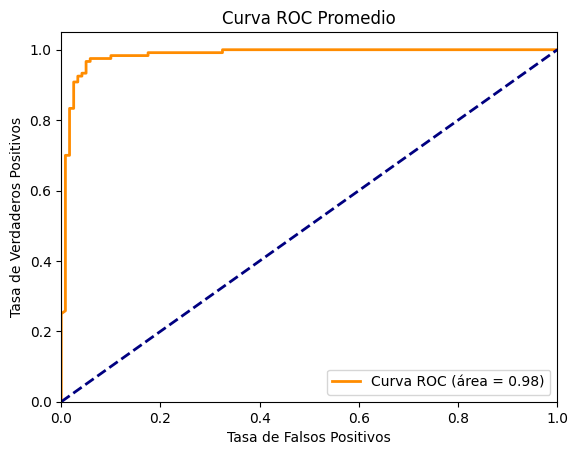

Matriz de Confusión Promedio:
[[114   6]
 [  4 116]]


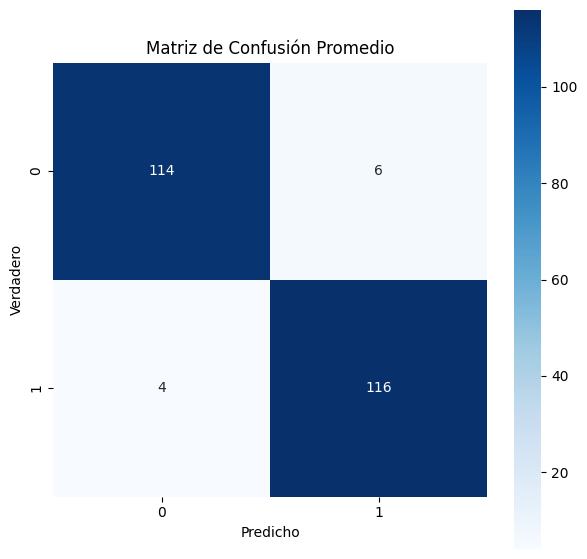

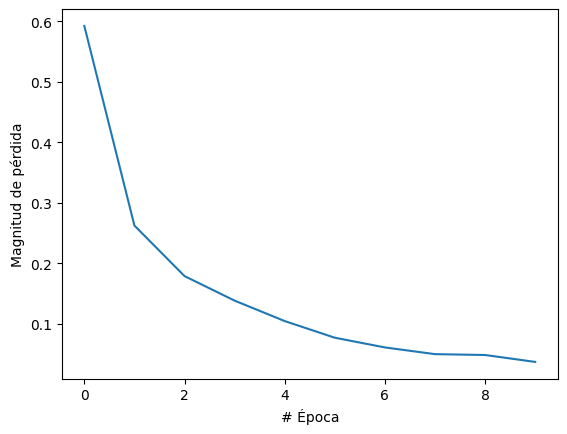

In [1]:
import os
import cv2
import numpy as np
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Importar el modelo preentrenado ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Especificar las rutas de las carpetas con imágenes
path_vinos = "D:\\MAESTRIA\\Tesis\\Bases_de_datos\\vclaroshd"
path_otros = "D:\\MAESTRIA\Tesis\\Bases_de_datos\\voscuroshd"

# Define el tamaño deseado para todas las imágenes
ancho_deseado = 224
alto_deseado = 224

# Crea listas vacías para almacenar las imágenes y sus etiquetas
imagenes = []
etiquetas = []

for filename in os.listdir(path_vinos):
    img = cv2.imread(os.path.join(path_vinos, filename))
    img = cv2.resize(img, (ancho_deseado, alto_deseado))

    # Preprocesa la imagen para ResNet50
    img = preprocess_input(img)  
    
    imagenes.append(img)
    etiquetas.append(1)

for filename in os.listdir(path_otros):
    img = cv2.imread(os.path.join(path_otros, filename))
    img = cv2.resize(img, (ancho_deseado, alto_deseado))
    img = preprocess_input(img)  # Preprocesa la imagen para ResNet50
    imagenes.append(img)
    etiquetas.append(0)

imagenes = np.array(imagenes, dtype=np.float32)
etiquetas = np.array(etiquetas)

# Define el número de pliegues (folds) que deseas utilizar
num_folds = 3  
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Crea listas para almacenar las puntuaciones de precisión de cada fold y las predicciones de probabilidad

accuracy_scores = []
all_y_true = []
all_y_prob = []
all_y_pred = []

for train_index, test_index in kf.split(imagenes):
    X_train, X_test = imagenes[train_index], imagenes[test_index]
    y_train, y_test = etiquetas[train_index], etiquetas[test_index]

    # Cargar el modelo ResNet50 preentrenado
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(alto_deseado, ancho_deseado, 3))
    
    # Agregar capas personalizadas para la clasificación
    x = base_model.output
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    predictions = keras.layers.Dense(2, activation='softmax')(x)
    
    # Crear el modelo completo
    model = keras.models.Model(inputs=base_model.input, outputs=predictions)
    
    # Congelar las capas del modelo base (ResNet50)
    for layer in base_model.layers:
        layer.trainable = False
    
    # Compilar el modelo
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=10)

    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    accuracy_scores.append(test_acc)

    # Realizar predicciones de probabilidad y etiquetas en el conjunto de prueba
    y_prob = model.predict(X_test)
    y_pred = np.argmax(y_prob, axis=1)
    all_y_true.extend(y_test)
    all_y_prob.extend(y_prob[:, 1])
    all_y_pred.extend(y_pred)

# Calcula el promedio de las puntuaciones de precisión de todos los folds
average_accuracy = np.mean(accuracy_scores)

# Calcula la exactitud promedio
average_roc_auc = accuracy_score(all_y_true, np.round(all_y_prob))

# Calcula la matriz de confusión promedio
cm = confusion_matrix(all_y_true, all_y_pred)

# Imprime el promedio de precisión y la exactitud promedio
print(f'Promedio de precisión a través de {num_folds} folds: {average_accuracy}')
print(f'Exactitud promedio a través de {num_folds} folds: {average_roc_auc}')

# Calcula la curva ROC promedio
fpr, tpr, _ = roc_curve(all_y_true, all_y_prob)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC promedio
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Promedio')
plt.legend(loc="lower right")
plt.show()

# Imprime la matriz de confusión promedio
print('Matriz de Confusión Promedio:')
print(cm)

# Grafica la matriz de confusión promedio
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión Promedio')
plt.show()

# Ver la función de pérdida
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

** vinos 4 soles entre otros vinos**
- 84  imágenes con el vino 4 soles 
- 84  imágenes sin el vino 4 soles

Epoch 1/10
4/4 [==============================] - 12s 2s/step - loss: 1.7347 - accuracy: 0.5089
Epoch 2/10
4/4 [==============================] - 6s 1s/step - loss: 0.9280 - accuracy: 0.5357
Epoch 3/10
4/4 [==============================] - 6s 1s/step - loss: 0.5175 - accuracy: 0.6964
Epoch 4/10
4/4 [==============================] - 6s 2s/step - loss: 0.3476 - accuracy: 0.8929
Epoch 5/10
4/4 [==============================] - 6s 1s/step - loss: 0.3051 - accuracy: 0.8929
Epoch 6/10
4/4 [==============================] - 6s 1s/step - loss: 0.2733 - accuracy: 0.8839
Epoch 7/10
4/4 [==============================] - 6s 1s/step - loss: 0.2127 - accuracy: 0.9375
Epoch 8/10
4/4 [==============================] - 6s 1s/step - loss: 0.1899 - accuracy: 0.9286
Epoch 9/10
4/4 [==============================] - 6s 1s/step - loss: 0.1449 - accuracy: 0.9821
Epoch 10/10
2/2 [==============================] - 4s 1s/step
Epoch 1/10
4/4 [==============================] - 12s 2s/step - loss: 1.2115 - acc

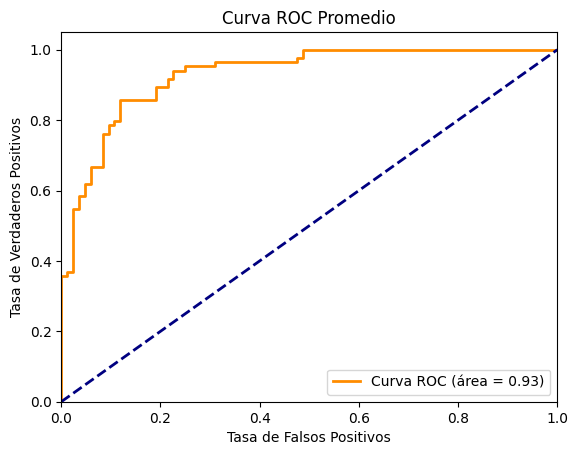

Matriz de Confusión Promedio:
[[67 17]
 [ 9 75]]


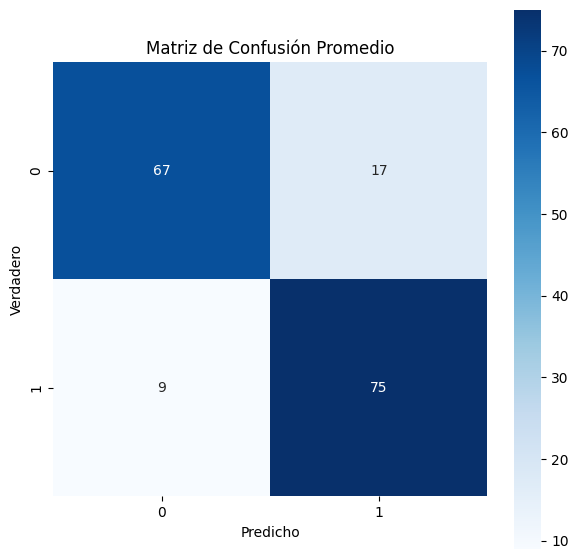

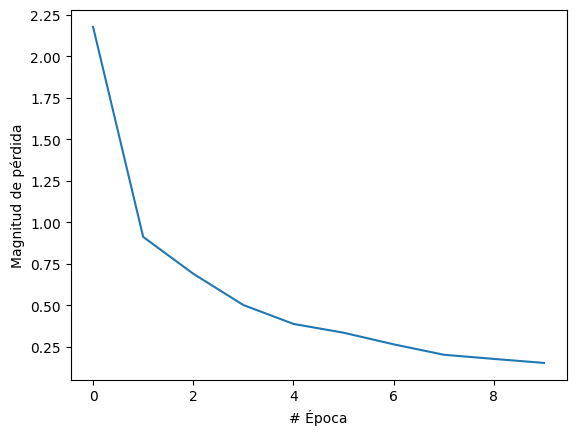

In [3]:
import os
import cv2
import numpy as np
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Importar el modelo preentrenado ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Especificar las rutas de las carpetas con imágenes
path_vinos = "D:\\MAESTRIA\\Tesis\\Bases_de_datos\\4soles"
path_otros = "D:\\MAESTRIA\Tesis\\Bases_de_datos\\sin4soles"

# Define el tamaño deseado para todas las imágenes
ancho_deseado = 224
alto_deseado = 224

# Crea listas vacías para almacenar las imágenes y sus etiquetas
imagenes = []
etiquetas = []

for filename in os.listdir(path_vinos):
    img = cv2.imread(os.path.join(path_vinos, filename))
    img = cv2.resize(img, (ancho_deseado, alto_deseado))

    # Preprocesa la imagen para ResNet50
    img = preprocess_input(img)  
    
    imagenes.append(img)
    etiquetas.append(1)

for filename in os.listdir(path_otros):
    img = cv2.imread(os.path.join(path_otros, filename))
    img = cv2.resize(img, (ancho_deseado, alto_deseado))
    img = preprocess_input(img)  # Preprocesa la imagen para ResNet50
    imagenes.append(img)
    etiquetas.append(0)

imagenes = np.array(imagenes, dtype=np.float32)
etiquetas = np.array(etiquetas)

# Define el número de pliegues (folds) que deseas utilizar
num_folds = 3  
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Crea listas para almacenar las puntuaciones de precisión de cada fold y las predicciones de probabilidad

accuracy_scores = []
all_y_true = []
all_y_prob = []
all_y_pred = []

for train_index, test_index in kf.split(imagenes):
    X_train, X_test = imagenes[train_index], imagenes[test_index]
    y_train, y_test = etiquetas[train_index], etiquetas[test_index]

    # Cargar el modelo ResNet50 preentrenado
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(alto_deseado, ancho_deseado, 3))
    
    # Agregar capas personalizadas para la clasificación
    x = base_model.output
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    predictions = keras.layers.Dense(2, activation='softmax')(x)
    
    # Crear el modelo completo
    model = keras.models.Model(inputs=base_model.input, outputs=predictions)
    
    # Congelar las capas del modelo base (ResNet50)
    for layer in base_model.layers:
        layer.trainable = False
    
    # Compilar el modelo
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=10)

    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    accuracy_scores.append(test_acc)

    # Realizar predicciones de probabilidad y etiquetas en el conjunto de prueba
    y_prob = model.predict(X_test)
    y_pred = np.argmax(y_prob, axis=1)
    all_y_true.extend(y_test)
    all_y_prob.extend(y_prob[:, 1])
    all_y_pred.extend(y_pred)

# Calcula el promedio de las puntuaciones de precisión de todos los folds
average_accuracy = np.mean(accuracy_scores)

# Calcula la exactitud promedio
average_roc_auc = accuracy_score(all_y_true, np.round(all_y_prob))

# Calcula la matriz de confusión promedio
cm = confusion_matrix(all_y_true, all_y_pred)

# Imprime el promedio de precisión y la exactitud promedio
print(f'Promedio de precisión a través de {num_folds} folds: {average_accuracy}')
print(f'Exactitud promedio a través de {num_folds} folds: {average_roc_auc}')

# Calcula la curva ROC promedio
fpr, tpr, _ = roc_curve(all_y_true, all_y_prob)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC promedio
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Promedio')
plt.legend(loc="lower right")
plt.show()

# Imprime la matriz de confusión promedio
print('Matriz de Confusión Promedio:')
print(cm)

# Grafica la matriz de confusión promedio
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión Promedio')
plt.show()

# Ver la función de pérdida
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

** vinos 4 soles y otro entre otros vinos**
- 134  imágenes con 2 vinos especificos en todas las fotos
- 132  imágenes sin ninguno de los 2 vinos en las fotos 

Epoch 1/10
6/6 [==============================] - 17s 2s/step - loss: 0.9640 - accuracy: 0.5819
Epoch 2/10
6/6 [==============================] - 9s 2s/step - loss: 0.5320 - accuracy: 0.6949
Epoch 3/10
6/6 [==============================] - 9s 1s/step - loss: 0.4377 - accuracy: 0.8192
Epoch 4/10
6/6 [==============================] - 9s 1s/step - loss: 0.3388 - accuracy: 0.8644
Epoch 5/10
6/6 [==============================] - 9s 1s/step - loss: 0.2881 - accuracy: 0.8870
Epoch 6/10
6/6 [==============================] - 9s 1s/step - loss: 0.2824 - accuracy: 0.8757
Epoch 7/10
6/6 [==============================] - 9s 1s/step - loss: 0.2587 - accuracy: 0.8814
Epoch 8/10
6/6 [==============================] - 9s 1s/step - loss: 0.2124 - accuracy: 0.9322
Epoch 9/10
6/6 [==============================] - 9s 1s/step - loss: 0.1606 - accuracy: 0.9661
Epoch 10/10
3/3 [==============================] - 6s 2s/step
Epoch 1/10
6/6 [==============================] - 13s 1s/step - loss: 0.8927 - acc

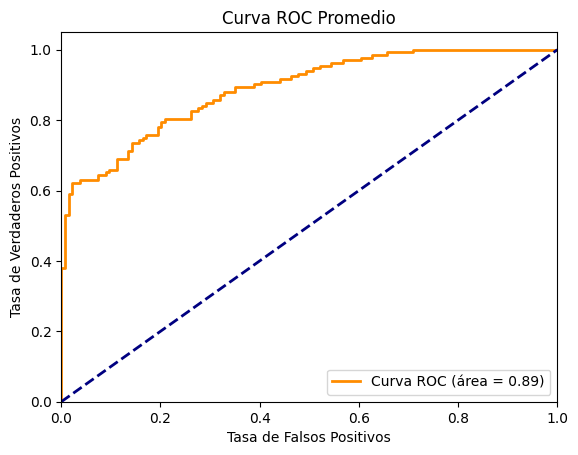

Matriz de Confusión Promedio:
[[108  26]
 [ 32 100]]


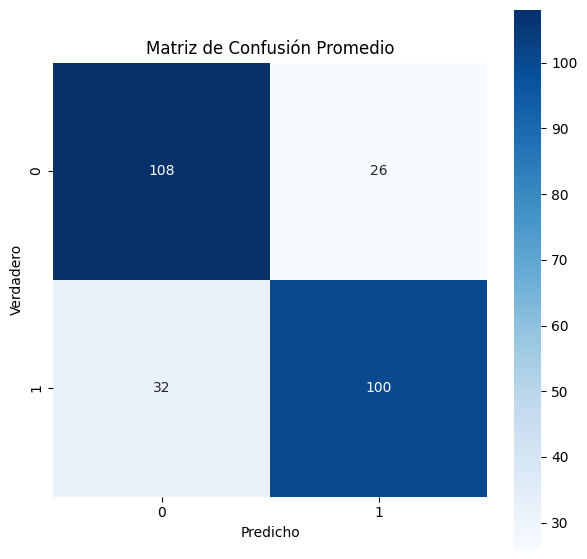

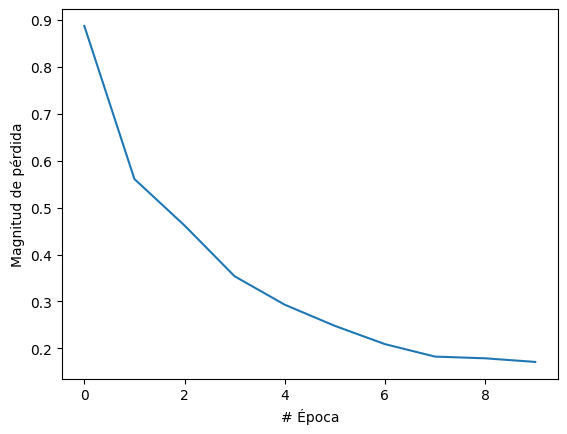

In [4]:
import os
import cv2
import numpy as np
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Importar el modelo preentrenado ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Especificar las rutas de las carpetas con imágenes
path_vinos = "D:\\MAESTRIA\\Tesis\\Bases_de_datos\\6"
path_otros = "D:\\MAESTRIA\Tesis\\Bases_de_datos\\62"

# Define el tamaño deseado para todas las imágenes
ancho_deseado = 224
alto_deseado = 224

# Crea listas vacías para almacenar las imágenes y sus etiquetas
imagenes = []
etiquetas = []

for filename in os.listdir(path_vinos):
    img = cv2.imread(os.path.join(path_vinos, filename))
    img = cv2.resize(img, (ancho_deseado, alto_deseado))

    # Preprocesa la imagen para ResNet50
    img = preprocess_input(img)  
    
    imagenes.append(img)
    etiquetas.append(1)

for filename in os.listdir(path_otros):
    img = cv2.imread(os.path.join(path_otros, filename))
    img = cv2.resize(img, (ancho_deseado, alto_deseado))
    img = preprocess_input(img)  # Preprocesa la imagen para ResNet50
    imagenes.append(img)
    etiquetas.append(0)

imagenes = np.array(imagenes, dtype=np.float32)
etiquetas = np.array(etiquetas)

# Define el número de pliegues (folds) que deseas utilizar
num_folds = 3  
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Crea listas para almacenar las puntuaciones de precisión de cada fold y las predicciones de probabilidad

accuracy_scores = []
all_y_true = []
all_y_prob = []
all_y_pred = []

for train_index, test_index in kf.split(imagenes):
    X_train, X_test = imagenes[train_index], imagenes[test_index]
    y_train, y_test = etiquetas[train_index], etiquetas[test_index]

    # Cargar el modelo ResNet50 preentrenado
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(alto_deseado, ancho_deseado, 3))
    
    # Agregar capas personalizadas para la clasificación
    x = base_model.output
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    predictions = keras.layers.Dense(2, activation='softmax')(x)
    
    # Crear el modelo completo
    model = keras.models.Model(inputs=base_model.input, outputs=predictions)
    
    # Congelar las capas del modelo base (ResNet50)
    for layer in base_model.layers:
        layer.trainable = False
    
    # Compilar el modelo
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=10)

    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    accuracy_scores.append(test_acc)

    # Realizar predicciones de probabilidad y etiquetas en el conjunto de prueba
    y_prob = model.predict(X_test)
    y_pred = np.argmax(y_prob, axis=1)
    all_y_true.extend(y_test)
    all_y_prob.extend(y_prob[:, 1])
    all_y_pred.extend(y_pred)

# Calcula el promedio de las puntuaciones de precisión de todos los folds
average_accuracy = np.mean(accuracy_scores)

# Calcula la exactitud promedio
average_roc_auc = accuracy_score(all_y_true, np.round(all_y_prob))

# Calcula la matriz de confusión promedio
cm = confusion_matrix(all_y_true, all_y_pred)

# Imprime el promedio de precisión y la exactitud promedio
print(f'Promedio de precisión a través de {num_folds} folds: {average_accuracy}')
print(f'Exactitud promedio a través de {num_folds} folds: {average_roc_auc}')

# Calcula la curva ROC promedio
fpr, tpr, _ = roc_curve(all_y_true, all_y_prob)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC promedio
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Promedio')
plt.legend(loc="lower right")
plt.show()

# Imprime la matriz de confusión promedio
print('Matriz de Confusión Promedio:')
print(cm)

# Grafica la matriz de confusión promedio
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión Promedio')
plt.show()

# Ver la función de pérdida
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])